plotting pid as a function of prediction

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
from torchmetrics import ConfusionMatrix
import torch
from sklearn.preprocessing import (QuantileTransformer, quantile_transform)
import itertools

/groups/icecube/qgf305/anaconda3/envs/graphnet/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
path_to_mc = "/groups/icecube/peter/storage/Multiclassification/Real/last_one_lvl3MC/dynedge_pid_Real_run_21.5_mill_equal_frac_/results_first.csv"
mc_data = pd.read_csv(path_to_mc, index_col=[0])
path_to_rd = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_stop_track_muon/Inference/pid_Leon_RD_results_first.csv"
rd_data = pd.read_csv(path_to_rd, index_col=[0])

In [4]:
preds = ["pid_noise_pred","pid_muon_pred","pid_neutrino_pred"]
pids = [1,12,13]

In [5]:
## transform monte carlo data
# remove anti
mc_data['pid'] = mc_data['pid'].apply(abs)
# make all neutrinos the same class; to match training classes
mc_data.loc[mc_data['pid']==14, "pid"]=12
mc_data.loc[mc_data['pid']==16, "pid"]=12

print("unique particle ID's and their count: \n", mc_data[["pid_noise_pred","pid"]].groupby("pid").count())
print()
print("data:")
mc_data

unique particle ID's and their count: 
       pid_noise_pred
pid                 
1.0          2474861
12.0         2475330
13.0         2474809

data:


,pid_noise_pred,pid_muon_pred,pid_neutrino_pred,pid,event_no
0,1.000000e+00,0.000000,0.000000e+00,1.0,23434375.0
1,3.946079e-22,1.000000,3.906106e-07,13.0,70953235.0
2,1.827151e-20,1.000000,1.306228e-07,13.0,97961265.0
3,3.665486e-01,0.022993,6.104581e-01,12.0,33636682.0
4,2.773106e-01,0.017270,7.054196e-01,12.0,53035643.0
...,...,...,...,...,...
7424995,1.000000e+00,0.000000,0.000000e+00,1.0,66993636.0
7424996,9.246089e-11,0.916026,8.397368e-02,13.0,58567439.0
7424997,6.353963e-01,0.008736,3.558680e-01,12.0,81515634.0
7424998,8.316677e-03,0.650760,3.409231e-01,12.0,221130.0


In [6]:
data = pd.DataFrame()
for pred in preds:
    data["mc_"+pred.split("_")[1]] = mc_data[pred]
    data["rd_"+pred.split("_")[1]] = rd_data[pred]

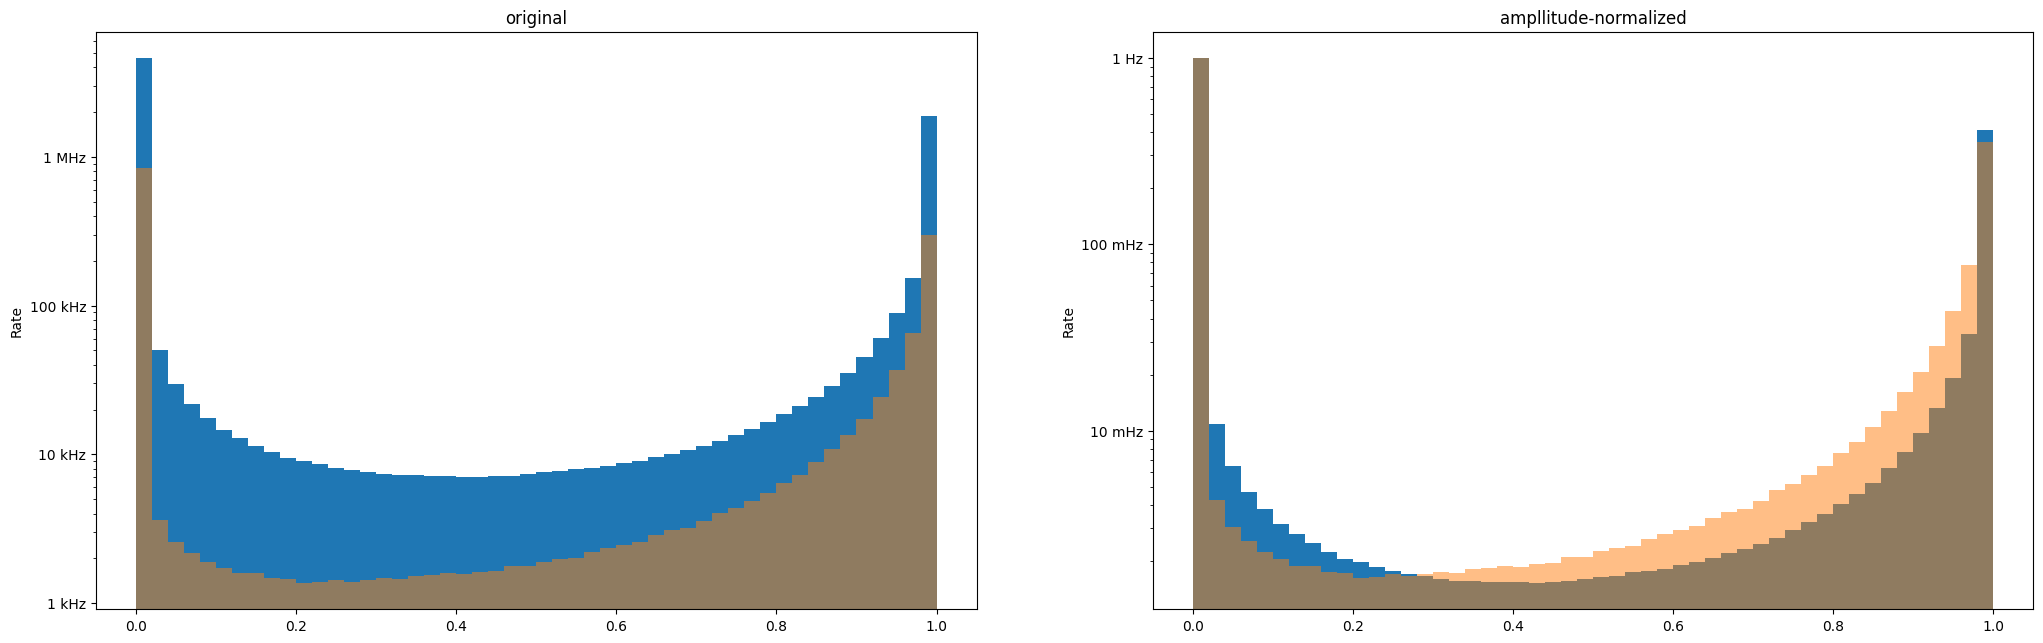

<Figure size 640x480 with 0 Axes>

In [15]:
num_bin = 50
bin_lims = np.linspace(0,1,num_bin+1)
bin_centers = 0.5*(bin_lims[:-1]+bin_lims[1:])
bin_widths = bin_lims[1:]-bin_lims[:-1]

##computing the histograms
hist1, _ = np.histogram(data["mc_noise"], bins=bin_lims)
hist2, _ = np.histogram(data["rd_noise"], bins=bin_lims)

##normalizing
hist1b = hist1/np.max(hist1)
hist2b = hist2/np.max(hist2)

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize=(25,7.5))

ax1.bar(bin_centers, hist1, width = bin_widths, align = 'center')
ax1.bar(bin_centers, hist2, width = bin_widths, align = 'center', alpha = 0.5)
ax1.set_title('original')
ax1.set(ylabel='Rate',yscale='log')
ax1.yaxis.set_major_formatter(ticker.EngFormatter(unit='Hz'))

ax2.bar(bin_centers, hist1b, width = bin_widths, align = 'center')
ax2.bar(bin_centers, hist2b, width = bin_widths, align = 'center', alpha = 0.5)
ax2.set_title('ampllitude-normalized')
ax2.set(ylabel='Rate',yscale='log')
ax2.yaxis.set_major_formatter(ticker.EngFormatter(unit='Hz'))

plt.show()
plt.tight_layout()

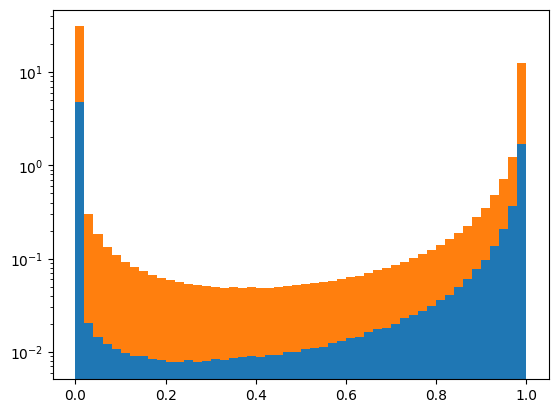

In [20]:
plt.hist([data["rd_noise"], data["mc_noise"]], density=True, log=True, stacked=True, bins=50);

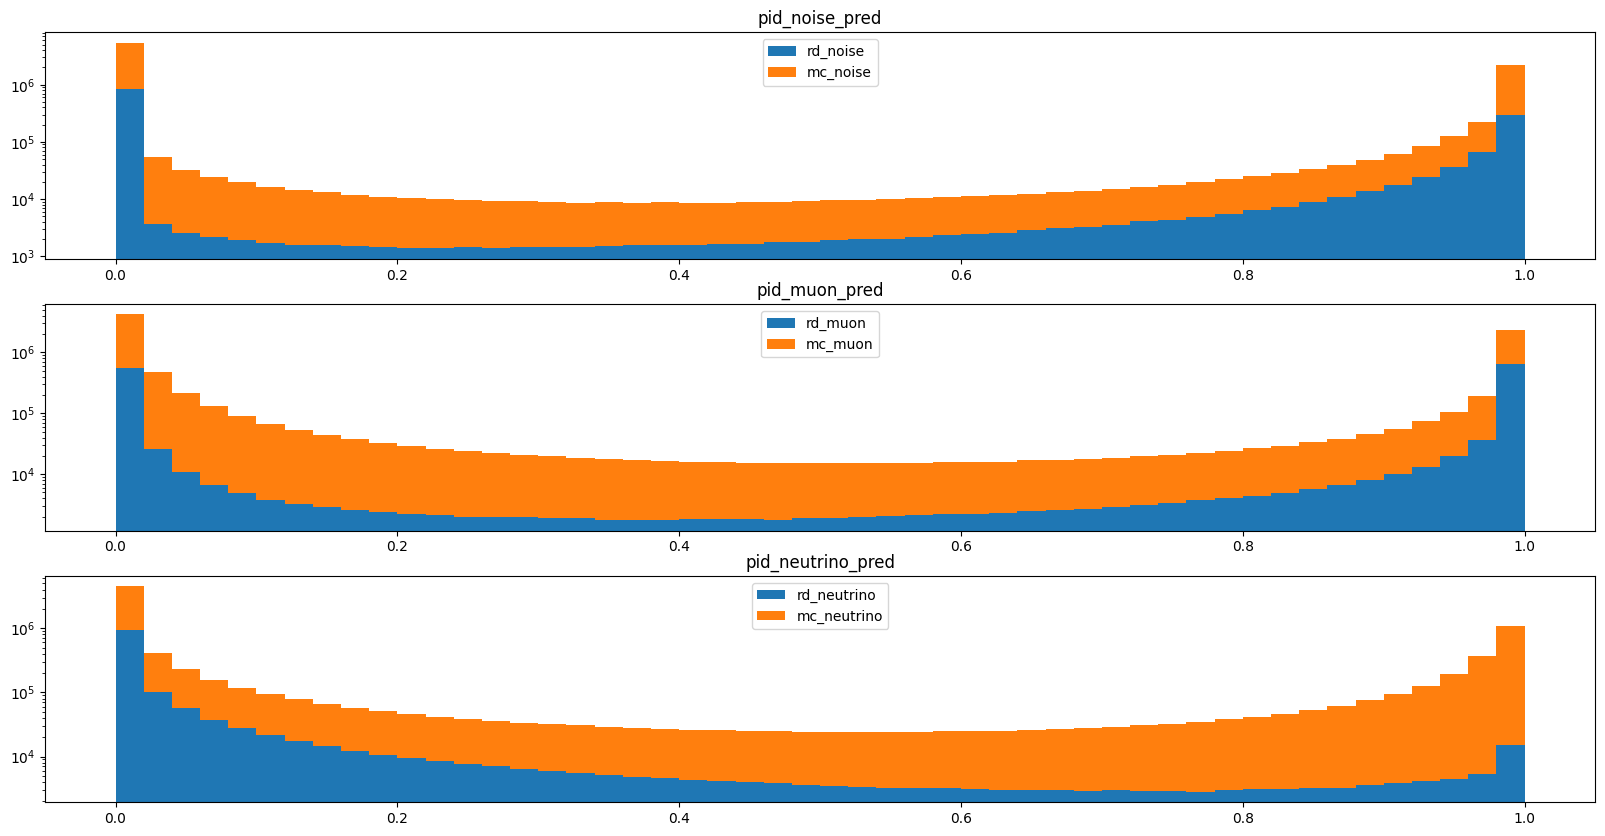

In [89]:

fig, axes = plt.subplots(3,1, figsize=(20,10))
for i, pred in enumerate(preds):
    feature = pred.split("_")[1]
    prefix_list=[]
    for prefix in itertools.product(["rd_", "mc_"], [feature]):
        prefix_list.append("".join(prefix))
    axes[i].set_title(pred)
    axes[i].hist(data[prefix_list], bins=50, stacked=True, log=True, label=prefix_list);
    axes[i].legend()

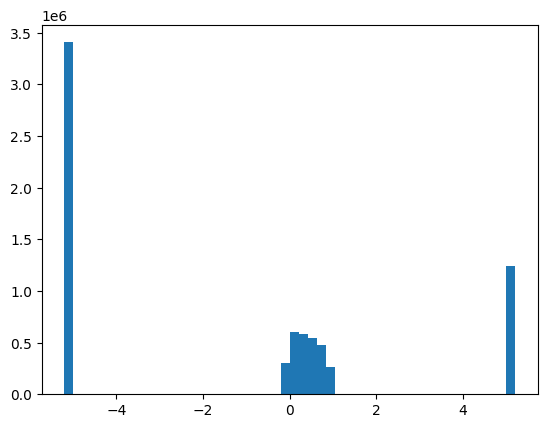

In [36]:
quantile = QuantileTransformer(output_distribution='normal')
data_trans = quantile.fit_transform(mc_data[["pid_noise_pred"]])
plt.hist(data_trans,bins=50);

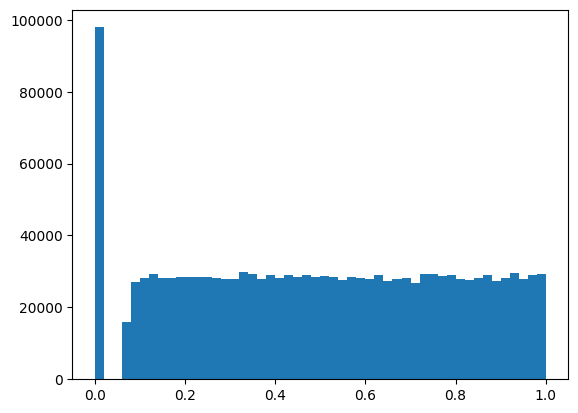

In [34]:
quantile = QuantileTransformer()
data_trans = quantile.fit_transform(rd_data[["pid_noise_pred"]])
plt.hist(data_trans,bins=50);

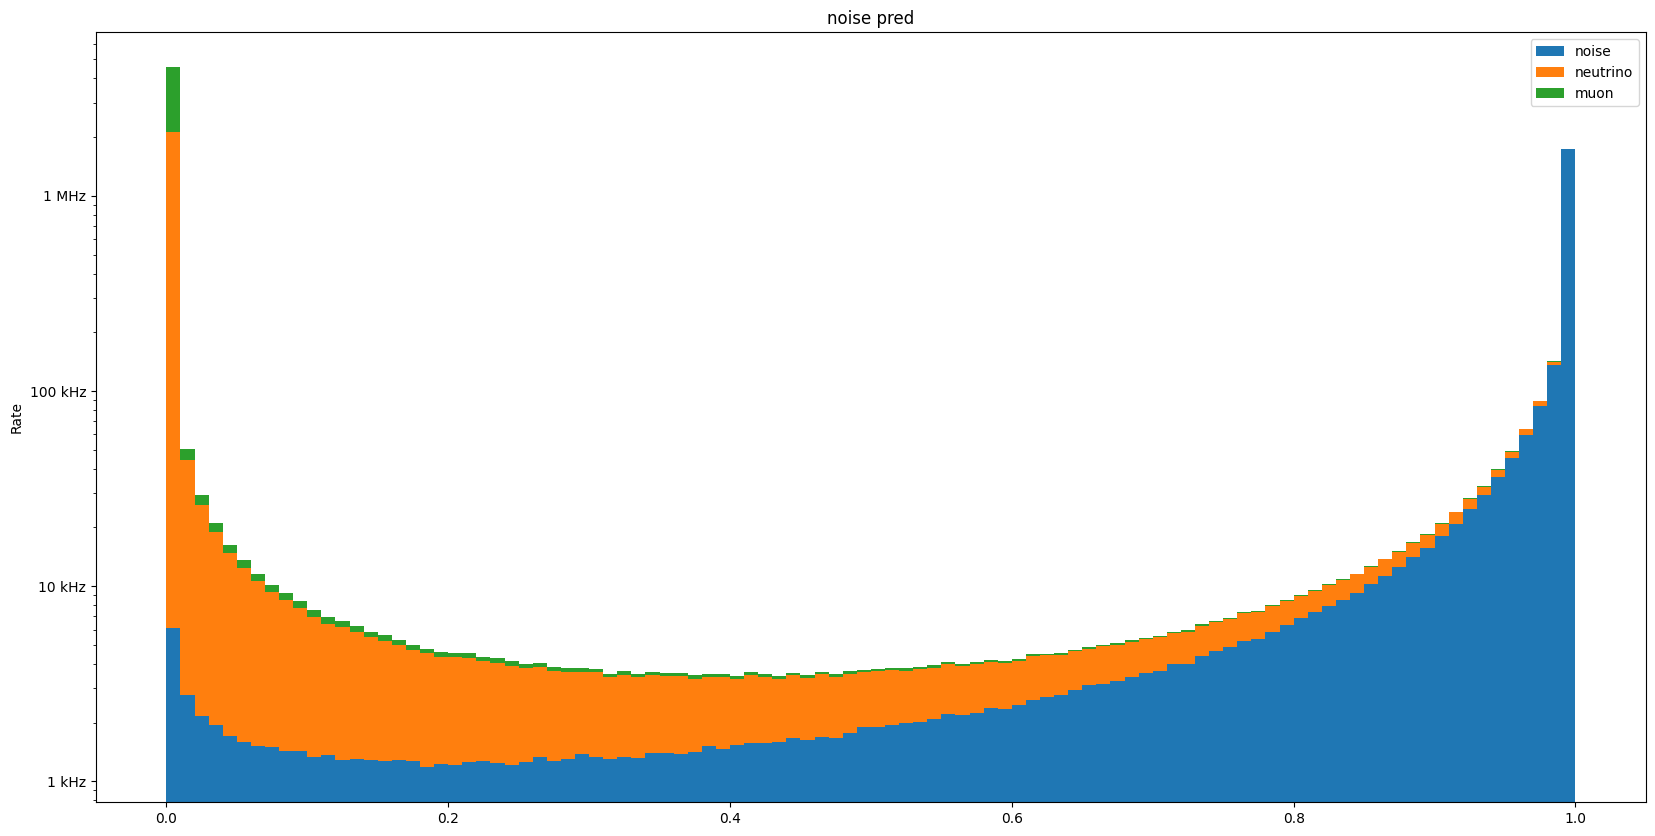

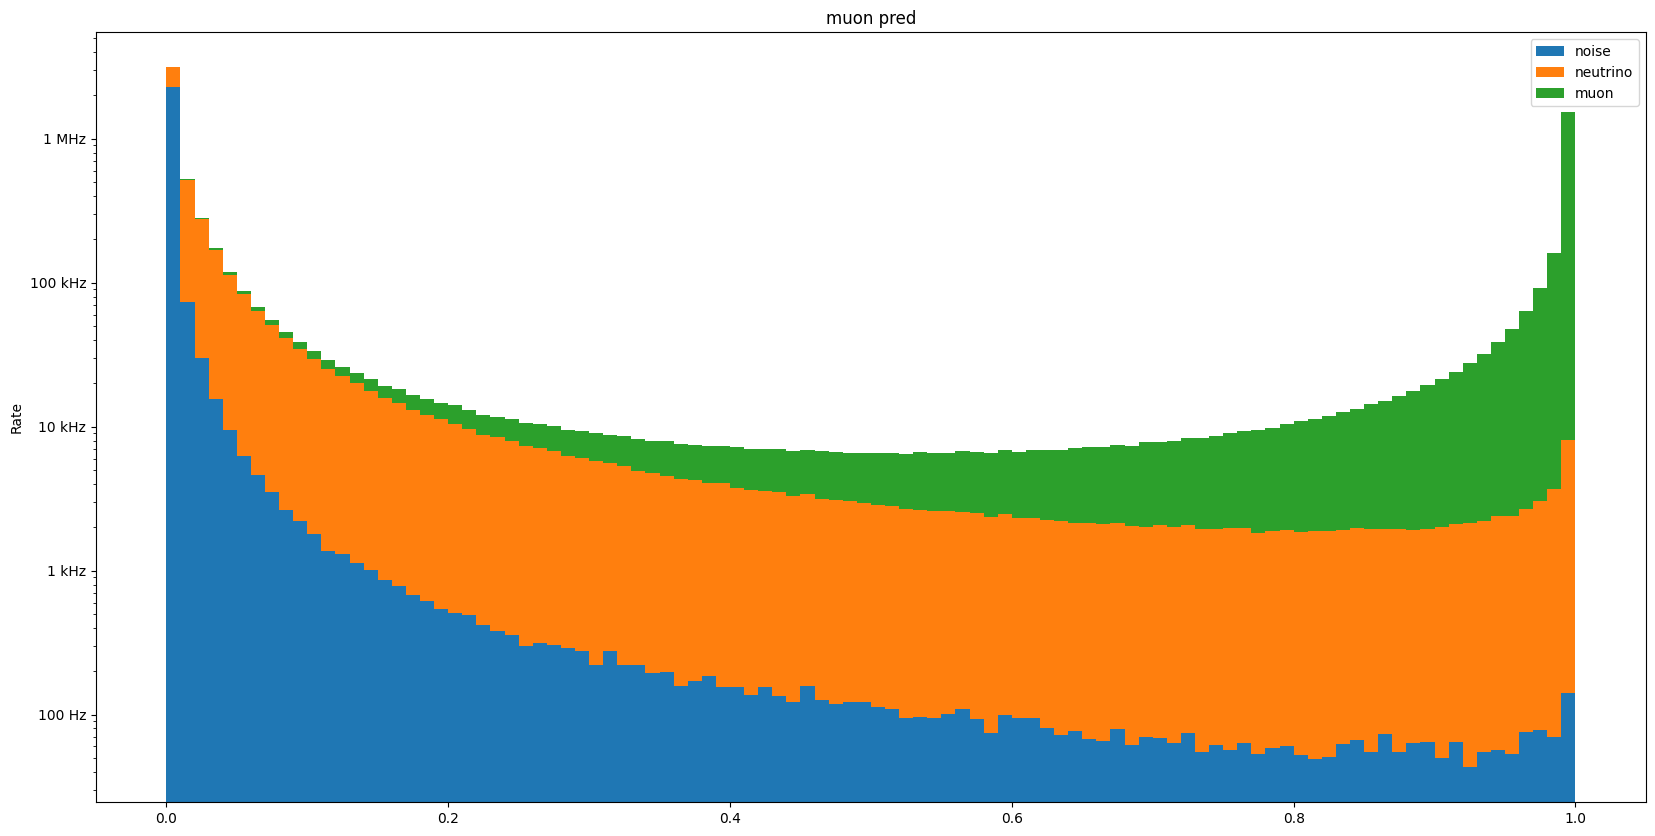

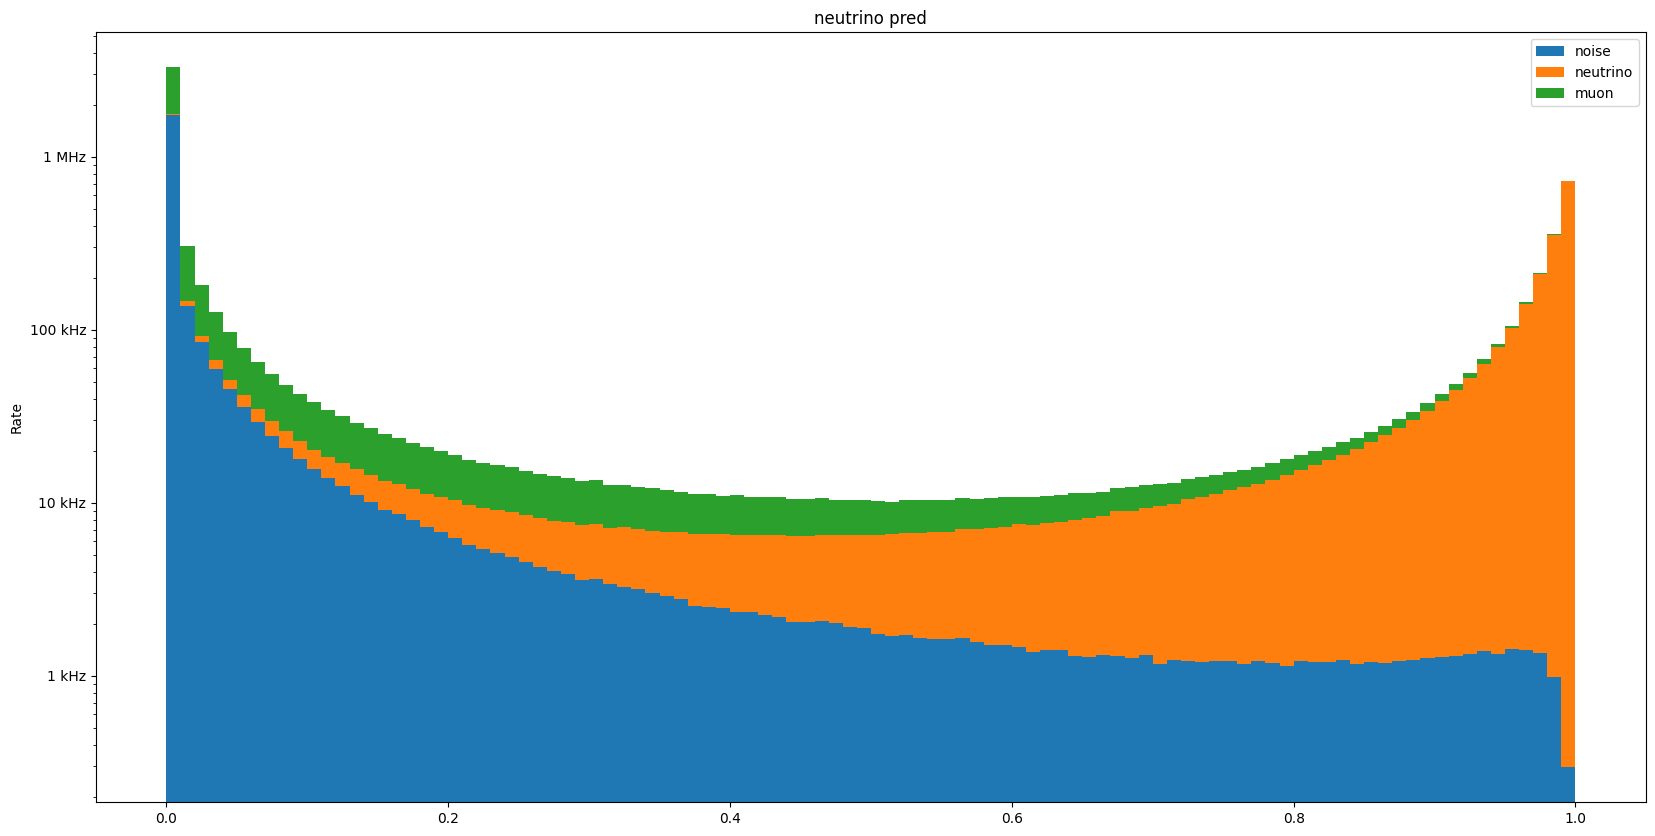

In [9]:

preds = ["pid_noise_pred","pid_muon_pred","pid_neutrino_pred"]
pids = [1,12,13]
color=["b","y","g"]
for i, pred in enumerate(preds):
    pid_list=[]
    pid_bin_centers=[]
    
    fig,ax = plt.subplots(figsize=(20,10))

    temp = 0
    for i, pid in enumerate(pids):
        y, bin_edges = np.histogram(feature_data[pred].loc[feature_data["pid"]==pid], bins=50)
        
        pid_list.append(feature_data[pred].loc[feature_data["pid"]==pid])
        pid_bin_centers.append(0.5*(bin_edges[1:] + bin_edges[:-1]))
    
    ax.hist(pid_list, bins=100, log=True, stacked=True, label=("noise", "neutrino", "muon"))
    ax.set(ylabel='Rate',yscale='log')
    ax.yaxis.set_major_formatter(ticker.EngFormatter(unit='Hz'))
    #for i, _ in enumerate(pids):
    #    plt.errorbar(pid_bin_centers[i], pid_histlist[i], yerr = stds[i], fmt=f".{color[i]}")
    plt.title(pred.replace("_"," ")[4:])
    plt.legend()
    plt.savefig("/groups/icecube/qgf305/workspace/analyses/multi_classification_on_stop_and_track_muons/plotting/distributions/test_plot/"+pred.replace("_","")[3:-4]+".png")

In [ ]:
feature_data["pid"].loc[feature_data[["pid_noise_pred","pid_muon_pred","pid_neutrino_pred"]].max(axis=1)]

In [39]:


preds = feature_data[["pid_noise_pred","pid_muon_pred","pid_neutrino_pred"]].copy(deep=True)

preds["pid_noise_pred"] = preds["pid_noise_pred"].loc[feature_data["pid_noise_pred"] > feature_data["pid_muon_pred"]] = 1
preds

/tmp/ipykernel_14541/1288578722.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preds["pid_noise_pred"] = preds["pid_noise_pred"].loc[feature_data["pid_noise_pred"] > feature_data["pid_muon_pred"]] = 1


,pid_noise_pred,pid_muon_pred,pid_neutrino_pred
0,1,0.000000,0.000000e+00
1,1,1.000000,3.906106e-07
2,1,1.000000,1.306228e-07
3,1,0.022993,6.104581e-01
4,1,0.017270,7.054196e-01
...,...,...,...
7424995,1,0.000000,0.000000e+00
7424996,1,0.916026,8.397368e-02
7424997,1,0.008736,3.558680e-01
7424998,1,0.650760,3.409231e-01


In [21]:

preds = torch.tensor(feature_data[["pid_noise_pred","pid_muon_pred","pid_neutrino_pred"]].values)
target = torch.tensor(feature_data["pid"].astype(int).values)
target.size()

torch.Size([7425000])

In [25]:
confmat = ConfusionMatrix(num_classes=3)
confmat(preds, target)

ValueError: The highest label in `target` should be smaller than the size of the `C` dimension of `preds`.